In [113]:
import pandas as pd
import numpy as np

In [114]:
# filtered_edgelist_df = pd.read_csv('final_edgelist.csv')
filtered_edgelist_df = pd.read_csv('final_edgelist_gpt_o_mini_lista_cerrada_graph_machinelearning_V2.csv')
print('Full edgelist len:', len(filtered_edgelist_df))
print('Liinked edgelist len:', len(filtered_edgelist_df[filtered_edgelist_df['sentiment'] != 'no_link_found']))
filtered_edgelist_df.sample(2)

Full edgelist len: 687
Liinked edgelist len: 687


,parliamentarian_1,parliamentarian_2,proportion_agreement,region_1,region_2,partido_1,partido_2,Diputado_1,Diputado_2,sector_1,...,page_rank_1,page_rank_2,betweenness_1,betweenness_2,closeness_1,closeness_2,eigenvector_1,eigenvector_2,cluster_1,cluster_2
490,"Bravo, Marta","Ramirez, Guillermo",1.827404,Región de Ńuble (5),Región Metropolitana de Santiago (47),UDI,UDI,Marta Bravo Salinas,Guillermo Ramirez Diez,centro_derecha,...,0.002931,0.007040,0.0,0.001513,0.0,0.078947,0.025375,0.116817,cluster_5,cluster_5
680,"Becker, Miguel Angel","Mellado, Miguel",2.140975,Región de la Araucanía (11),Región de la Araucanía (11),RN,RN,Miguel Becker Alvear,Miguel Mellado Suazo,centro_derecha,...,0.002931,0.003604,0.0,0.000766,0.0,0.013158,0.013930,0.079305,cluster_4,cluster_4


In [115]:
# Similitud de partido (1 si son del mismo partido, 0 si no)
filtered_edgelist_df['same_party'] = (filtered_edgelist_df['partido_1'] == filtered_edgelist_df['partido_2']).astype(int)

# Similitud de sector político (1 si es el mismo sector, 0 si no)
filtered_edgelist_df['same_sector'] = (filtered_edgelist_df['sector_1'] == filtered_edgelist_df['sector_2']).astype(int)

# Similitud de región (1 si es la misma región, 0 si no)
filtered_edgelist_df['same_region'] = (filtered_edgelist_df['region_1'] == filtered_edgelist_df['region_2']).astype(int)

filtered_edgelist_df['same_cluster'] = (filtered_edgelist_df['cluster_1'] == filtered_edgelist_df['cluster_2']).astype(int)



In [116]:
filtered_edgelist_df

,parliamentarian_1,parliamentarian_2,proportion_agreement,region_1,region_2,partido_1,partido_2,Diputado_1,Diputado_2,sector_1,...,closeness_1,closeness_2,eigenvector_1,eigenvector_2,cluster_1,cluster_2,same_party,same_sector,same_region,same_cluster
0,"Barchiesi, Chiara","Castillo, Nathalie",0.876153,Región de Valparaíso (16),Región de Coquimbo (7),PLR,PCCh,Chiara Barchiesi Chavez,Nathalie Castillo Rojas,derecha,...,0.000000,0.076555,0.021665,0.063565,cluster_4,cluster_3,0,0,0,0
1,"Barchiesi, Chiara","Pizarro, Lorena",0.878788,Región de Valparaíso (16),Región Metropolitana de Santiago (47),PLR,PCCh,Chiara Barchiesi Chavez,Lorena Pizarro Sierra,derecha,...,0.000000,0.172379,0.021665,0.067971,cluster_4,cluster_4,0,0,0,1
2,"Barchiesi, Chiara","Pizarro, Lorena",0.878788,Región de Valparaíso (16),Región Metropolitana de Santiago (47),PLR,PCCh,Chiara Barchiesi Chavez,Lorena Pizarro Sierra,derecha,...,0.000000,0.172379,0.021665,0.067971,cluster_4,cluster_4,0,0,0,1
3,"Barchiesi, Chiara","Pizarro, Lorena",0.878788,Región de Valparaíso (16),Región Metropolitana de Santiago (47),PLR,PCCh,Chiara Barchiesi Chavez,Lorena Pizarro Sierra,derecha,...,0.000000,0.172379,0.021665,0.067971,cluster_4,cluster_4,0,0,0,1
4,"Kaiser, Johannes","Pizarro, Lorena",0.886693,Región Metropolitana de Santiago (47),Región Metropolitana de Santiago (47),PLR,PCCh,Johannes Kaiser Barents-Von Hohenhagen,Lorena Pizarro Sierra,derecha,...,0.085965,0.172379,0.086444,0.067971,cluster_2,cluster_4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,"Becker, Miguel Angel","Rathgeb, Jorge",2.151515,Región de la Araucanía (11),Región de la Araucanía (11),RN,RN,Miguel Becker Alvear,Jorge Rathgeb Schifferli,centro_derecha,...,0.000000,0.019737,0.013930,0.015628,cluster_4,cluster_4,1,1,1,1
683,"Rojas, Camila","Schneider, Emilia",2.171278,Región de Valparaíso (16),Región Metropolitana de Santiago (47),Comunes,CS,Camila Rojas Valderrama,Emilia Schneider Videla,izquierda,...,0.085580,0.125272,0.019404,0.069634,cluster_1,cluster_1,0,1,0,1
684,"Cicardini, Daniella","Manouchehri, Daniel",2.179183,Región de Atacama (5),Región de Coquimbo (7),PS,PS,Daniella Cicardini Milla,Daniel Manouchehri Moghadam Kashan Lobos,centro_izquierda,...,0.000000,0.077928,0.023192,0.026860,cluster_8,cluster_8,1,1,0,1
685,"Cicardini, Daniella","Manouchehri, Daniel",2.179183,Región de Atacama (5),Región de Coquimbo (7),PS,PS,Daniella Cicardini Milla,Daniel Manouchehri Moghadam Kashan Lobos,centro_izquierda,...,0.000000,0.077928,0.023192,0.026860,cluster_8,cluster_8,1,1,0,1


In [ ]:
# filtered_edgelist_df.rename(columns={'label': 'edge'}, inplace=True)


In [117]:
filtered_edgelist_df = filtered_edgelist_df.dropna(subset=['in_degree_1'])
# Crear un diccionario de mapeo
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}

# Reemplazar los valores en la columna 'sentiment'
filtered_edgelist_df['sentiment'] = filtered_edgelist_df['sentiment'].map(sentiment_mapping)

# Verificar el resultado
print(filtered_edgelist_df['sentiment'].value_counts())


sentiment
 1    412
-1    147
 0    128
Name: count, dtype: int64


# Regresión con métricas de grafo

In [118]:
data = filtered_edgelist_df[['proportion_agreement', 'common_neighbors', 'eigenvector_1', 'eigenvector_2','closeness_1', 'closeness_2', 'betweenness_1', 'betweenness_2', 'page_rank_1', 'page_rank_2', 'same_cluster','in_degree_1', 'out_degree_1', 'in_degree_2', 'out_degree_2', 'same_party', 'same_sector', 'same_region', 'sentiment']]


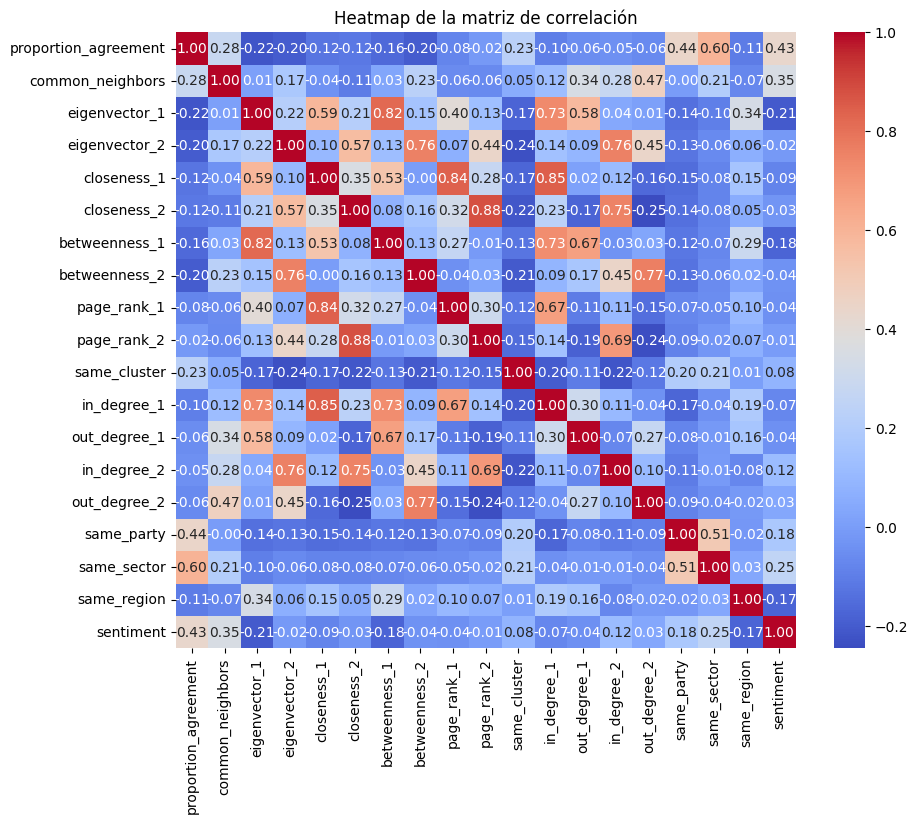

In [119]:
import seaborn as sns
from matplotlib import pyplot as plt

# Matriz de correlación para todas las características
correlation_matrix = data.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de la matriz de correlación')
plt.show()


In [120]:

correlation_matrix = data.corr()

abs_correlation_matrix = correlation_matrix.abs()

for i in range(len(abs_correlation_matrix)):
    abs_correlation_matrix.iloc[i, i] = 0

top_correlations = abs_correlation_matrix.unstack().sort_values(ascending=False)

print("Las correlaciones más altas:")
print(top_correlations.head(20))


Las correlaciones más altas:
page_rank_2    closeness_2      0.879652
closeness_2    page_rank_2      0.879652
in_degree_1    closeness_1      0.846841
closeness_1    in_degree_1      0.846841
               page_rank_1      0.840210
page_rank_1    closeness_1      0.840210
betweenness_1  eigenvector_1    0.823244
eigenvector_1  betweenness_1    0.823244
out_degree_2   betweenness_2    0.765281
betweenness_2  out_degree_2     0.765281
in_degree_2    eigenvector_2    0.761066
eigenvector_2  in_degree_2      0.761066
betweenness_2  eigenvector_2    0.760497
eigenvector_2  betweenness_2    0.760497
closeness_2    in_degree_2      0.753144
in_degree_2    closeness_2      0.753144
eigenvector_1  in_degree_1      0.734293
in_degree_1    eigenvector_1    0.734293
               betweenness_1    0.726555
betweenness_1  in_degree_1      0.726555
dtype: float64


In [121]:
# X: Conjunto de características
# y: Variable objetivo (proportion_agreement)

X = data[['common_neighbors', 'eigenvector_1', 'eigenvector_2','closeness_1', 'closeness_2', 'betweenness_1', 'betweenness_2', 'page_rank_1', 'page_rank_2', 'same_cluster','in_degree_1', 'out_degree_1', 'in_degree_2', 'out_degree_2', 'same_party', 'same_sector', 'same_region', 'sentiment']]
y = data['proportion_agreement']



In [122]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import xgboost as xgb
import pandas as pd


In [57]:

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definición ampliada de los hiperparámetros para probar
param_distributions = {
    'max_depth': [3, 5, 7, 9, 12, 15, 20, 25, 30],
    'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5, 1.0, 1.5],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7],
    'alpha': [0, 1, 5, 10, 15, 20]
}

# Búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=xg_reg, 
    param_distributions=param_distributions, 
    n_iter=200, 
    scoring='r2',  
    cv=5, 
    verbose=1, 
    random_state=42
)

random_search.fit(X_train, y_train)

results = random_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': results['mean_test_score'],
    'params': results['params']
})

# Ordenar el DataFrame por 'mean_test_score' en orden descendente
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Imprimir los resultados ordenados
for index, row in results_df.iterrows():
    print(f"Score (R^2): {row['mean_test_score']:.4f}, Hiperparámetros: {row['params']}")



Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Score (R^2): 0.6577, Hiperparámetros: {'subsample': 0.7, 'n_estimators': 700, 'min_child_weight': 4, 'max_depth': 30, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 1.0, 'alpha': 1}
Score (R^2): 0.6559, Hiperparámetros: {'subsample': 0.7, 'n_estimators': 600, 'min_child_weight': 4, 'max_depth': 20, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 0.8, 'alpha': 1}
Score (R^2): 0.6548, Hiperparámetros: {'subsample': 0.5, 'n_estimators': 800, 'min_child_weight': 5, 'max_depth': 20, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 1.0, 'alpha': 1}
Score (R^2): 0.6418, Hiperparámetros: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 4, 'max_depth': 15, 'learning_rate': 0.4, 'gamma': 0, 'colsample_bytree': 0.9, 'alpha': 1}
Score (R^2): 0.6414, Hiperparámetros: {'subsample': 1.0, 'n_estimators': 800, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8, 

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', subsample= 0.8, colsample_bytree=0.7, learning_rate=0.1,
                          max_depth=5, alpha=1, n_estimators=200, min_child_weight=4, gamma=0)

xg_reg.fit(X_train, y_train)


# Predecir en el conjunto de entrenamiento
y_train_pred = xg_reg.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Predecir en el conjunto de validación/prueba
y_test_pred = xg_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"RMSE Entrenamiento: {train_rmse}")
print(f"RMSE Prueba: {test_rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE Entrenamiento: 0.09198962682815529
RMSE Prueba: 0.20212830030947868
MAE: 0.14380344859065672
R²: 0.6532454173581028


c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


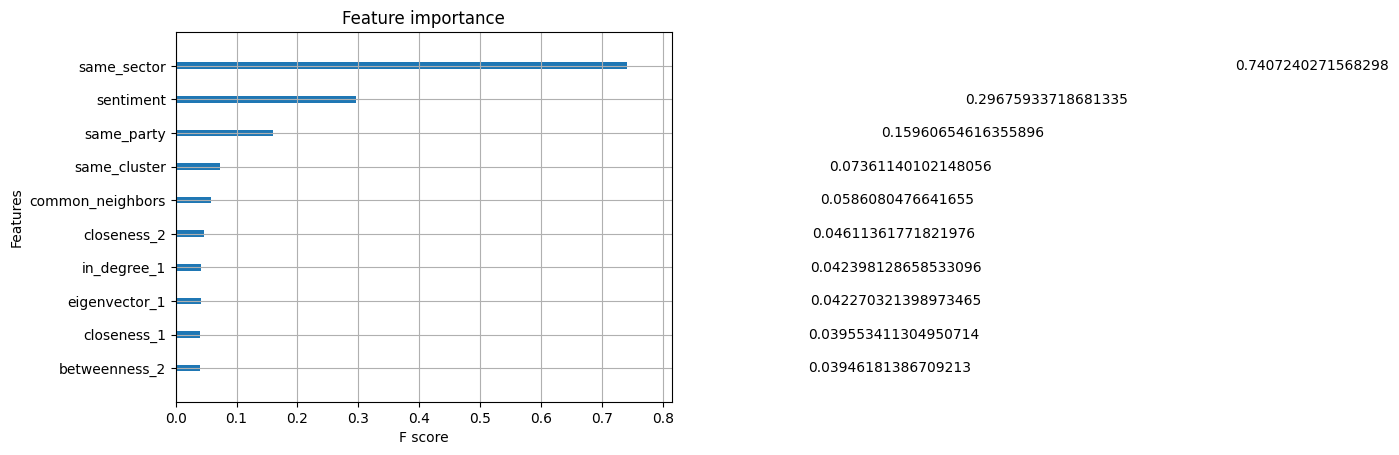

In [124]:
xgb.plot_importance(xg_reg, importance_type='gain', max_num_features=10)  
plt.show() #El aumento promedio en la métrica de rendimiento que se obtiene al usar una característica.


In [125]:
from sklearn.model_selection import cross_val_score
# Validación cruzada
cv_scores = cross_val_score(xg_reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertir scores negativos a positivos y calcular el RMSE
cv_rmse = np.sqrt(-cv_scores)

print(f"RMSE de Validación Cruzada: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")

RMSE de Validación Cruzada: 0.2946 ± 0.1310


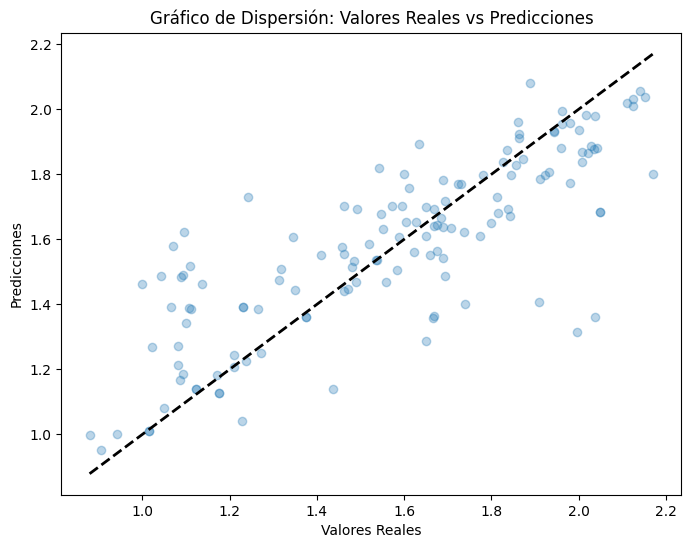

In [126]:
import matplotlib.pyplot as plt

# Predecir en el conjunto de prueba
y_test_pred = xg_reg.predict(X_test)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de Dispersión: Valores Reales vs Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea diagonal
plt.show()


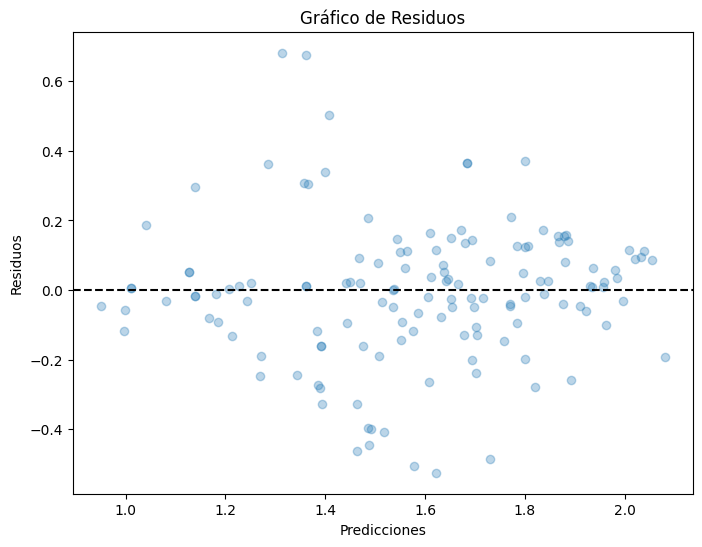

In [127]:
# Calcular residuos
residuals = y_test - y_test_pred

# Crear el gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, alpha=0.3)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.axhline(y=0, color='k', linestyle='--')  # Línea horizontal en 0
plt.show()


# Regresión sin métricas de grafo solo sentiment

In [30]:
datos = data[['proportion_agreement','same_party', 'same_sector', 'same_region', 'sentiment']]
# X: Conjunto de características (todas las columnas que has calculado)
# y: Variable objetivo (proportion_agreement)


X = datos[['same_party', 'same_sector', 'same_region', 'sentiment']]
y = datos['proportion_agreement']



In [31]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', subsample= 0.8, colsample_bytree=0.7, learning_rate=0.1,
                          max_depth=5, alpha=1, n_estimators=100, min_child_weight=4, gamma=0)

xg_reg.fit(X_train, y_train)


# Predecir en el conjunto de entrenamiento
y_train_pred = xg_reg.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Predecir en el conjunto de validación/prueba
y_test_pred = xg_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"RMSE Entrenamiento: {train_rmse}")
print(f"RMSE Prueba: {test_rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE Entrenamiento: 0.23280579058976555
RMSE Prueba: 0.23274316537310588
MAE: 0.1864668693801699
R²: 0.5402498979048536


c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


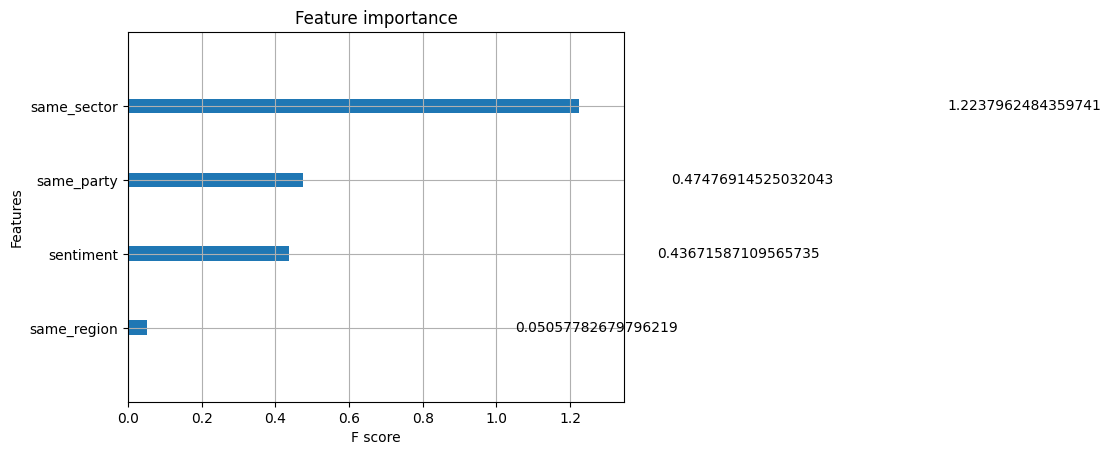

In [32]:
xgb.plot_importance(xg_reg, importance_type='gain', max_num_features=10)  
plt.show()

In [200]:
# Configuración del modelo XGBoost
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definición ampliada de los hiperparámetros para probar
param_distributions = {
    'max_depth': [3, 5, 7, 9, 12, 15, 20, 25, 30],
    'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5, 1.0, 1.5],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7],
    'alpha': [0, 1, 5, 10, 15, 20]
}

# Búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=xg_reg, 
    param_distributions=param_distributions, 
    n_iter=200, 
    scoring='r2', 
    cv=5, 
    verbose=1, 
    random_state=42
)

random_search.fit(X_train, y_train)

results = random_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': results['mean_test_score'],
    'params': results['params']
})

results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Imprimir los resultados ordenados
for index, row in results_df.iterrows():
    print(f"Score (R^2): {row['mean_test_score']:.4f}, Hiperparámetros: {row['params']}")


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Score (R^2): 0.4479, Hiperparámetros: {'subsample': 0.7, 'n_estimators': 700, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.9, 'alpha': 0}
Score (R^2): 0.4471, Hiperparámetros: {'subsample': 0.5, 'n_estimators': 700, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.9, 'alpha': 1}
Score (R^2): 0.4466, Hiperparámetros: {'subsample': 0.7, 'n_estimators': 600, 'min_child_weight': 4, 'max_depth': 20, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 0.8, 'alpha': 1}
Score (R^2): 0.4459, Hiperparámetros: {'subsample': 1.0, 'n_estimators': 800, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8, 'alpha': 1}
Score (R^2): 0.4458, Hiperparámetros: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 4, 'max_depth': 15, 'learning_rate': 0.4, 'gamma': 0, 'colsample_bytree': 0.9, 

In [33]:
from sklearn.model_selection import cross_val_score
# Validación cruzada
cv_scores = cross_val_score(xg_reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertir scores negativos a positivos y calcular el RMSE
cv_rmse = np.sqrt(-cv_scores)

print(f"RMSE de Validación Cruzada: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")

RMSE de Validación Cruzada: 0.3025 ± 0.1126


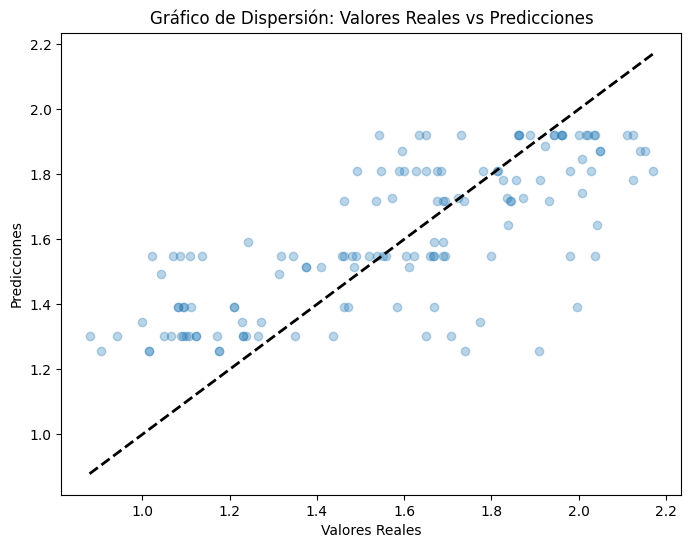

In [34]:
import matplotlib.pyplot as plt

# Predecir en el conjunto de prueba
y_test_pred = xg_reg.predict(X_test)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de Dispersión: Valores Reales vs Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea diagonal
plt.show()


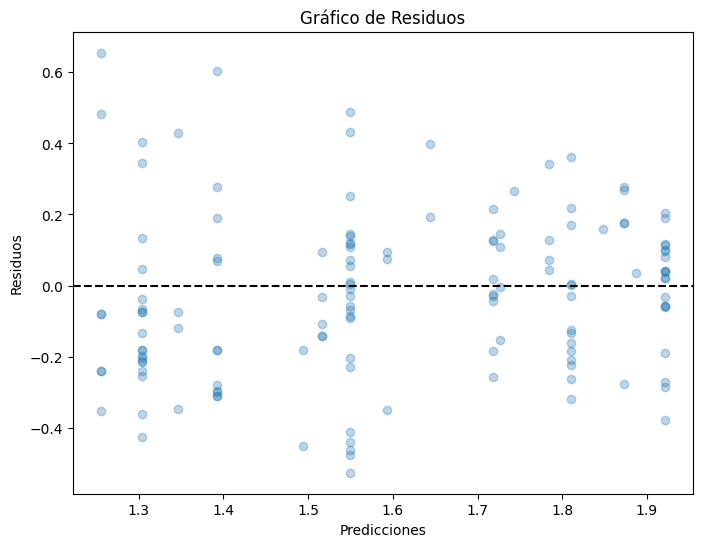

In [35]:
# Calcular residuos
residuals = y_test - y_test_pred

# Crear el gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, alpha=0.3)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.axhline(y=0, color='k', linestyle='--')  # Línea horizontal en 0
plt.show()


# Regresión pulida métricas de grafo

In [128]:
X2 = data[['common_neighbors', 'eigenvector_1', 'eigenvector_2','betweenness_1', 'betweenness_2', 'page_rank_1', 'page_rank_2', 'same_cluster','in_degree_1', 'out_degree_1', 'in_degree_2', 'out_degree_2', 'same_party', 'same_sector', 'same_region', 'sentiment']]
y2 = data['proportion_agreement']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Crear el modelo XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', subsample= 0.8, colsample_bytree=0.7, learning_rate=0.1,
                          max_depth=5, alpha=1, n_estimators=100, min_child_weight=4, gamma=0)

xg_reg.fit(X_train, y_train)


# Predecir en el conjunto de entrenamiento
y_train_pred = xg_reg.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Predecir en el conjunto de validación/prueba
y_test_pred = xg_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"RMSE Entrenamiento: {train_rmse}")
print(f"RMSE Prueba: {test_rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE Entrenamiento: 0.11226558603726686
RMSE Prueba: 0.1979189832366228
MAE: 0.1463785828865928
R²: 0.6675373489185497


c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


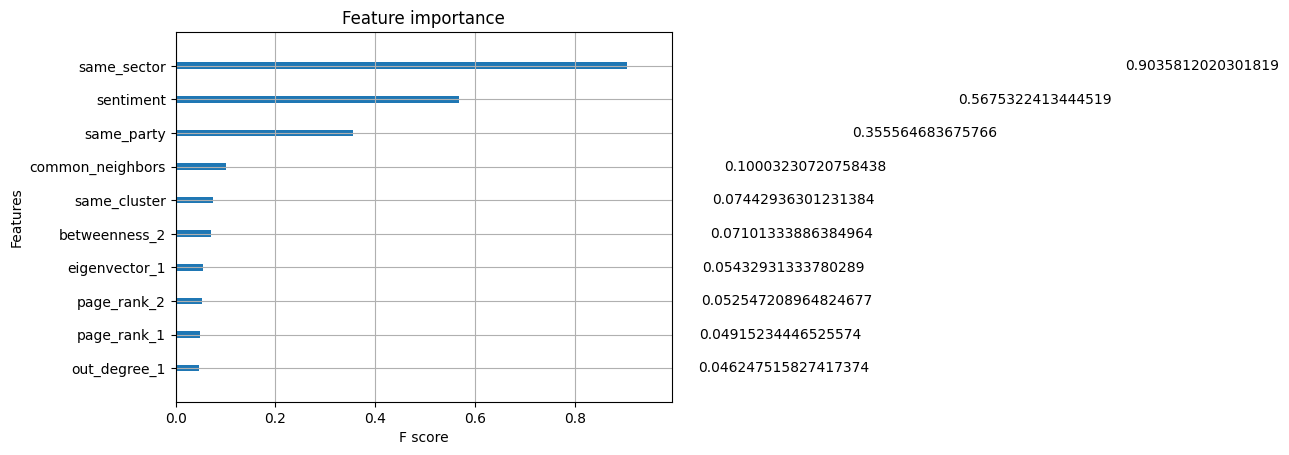

In [130]:
xgb.plot_importance(xg_reg, importance_type='gain', max_num_features=10)  
plt.show() #El aumento promedio en la métrica de rendimiento que se obtiene al usar una característica.

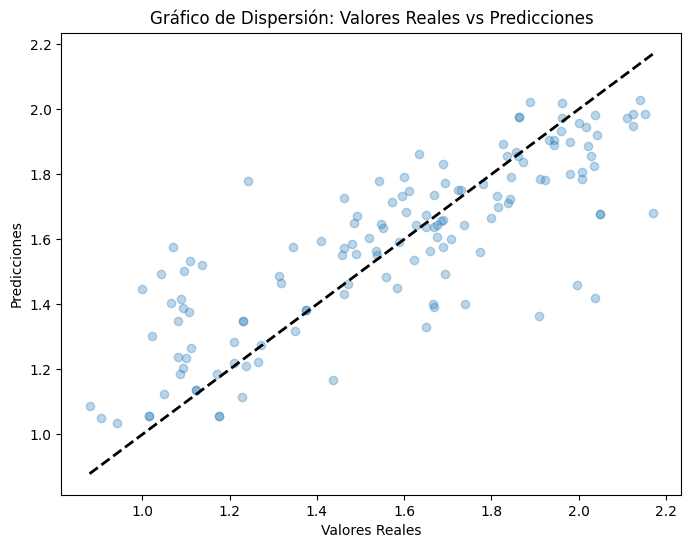

In [131]:
import matplotlib.pyplot as plt

# Predecir en el conjunto de prueba
y_test_pred = xg_reg.predict(X_test)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de Dispersión: Valores Reales vs Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea diagonal
plt.show()

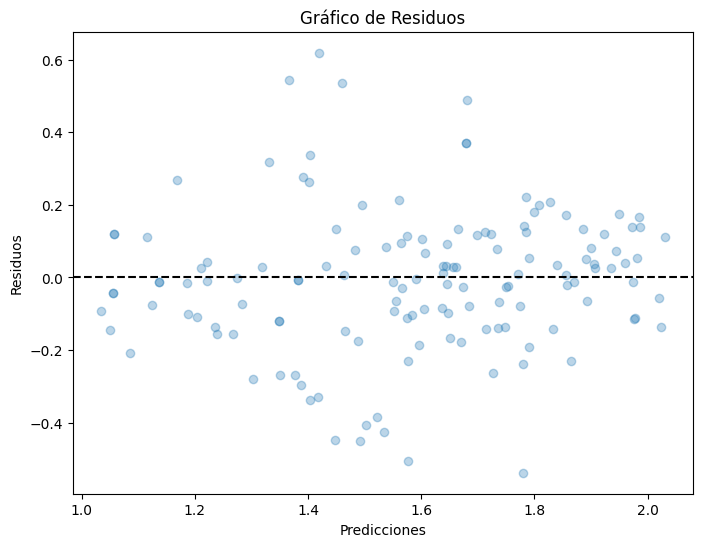

In [132]:
# Calcular residuos
residuals = y_test - y_test_pred

# Crear el gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, alpha=0.3)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.axhline(y=0, color='k', linestyle='--')  # Línea horizontal en 0
plt.show()


In [112]:

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definición ampliada de los hiperparámetros para probar
param_distributions = {
    'max_depth': [3, 5, 7, 9, 12, 15, 20, 25, 30],
    'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5, 1.0, 1.5],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7],
    'alpha': [0, 1, 5, 10, 15, 20]
}

# Búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=xg_reg, 
    param_distributions=param_distributions, 
    n_iter=200, 
    scoring='r2',  
    cv=5, 
    verbose=1, 
    random_state=42
)

random_search.fit(X_train, y_train)

results = random_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': results['mean_test_score'],
    'params': results['params']
})

# Ordenar el DataFrame por 'mean_test_score' en orden descendente
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Imprimir los resultados ordenados
for index, row in results_df.iterrows():
    print(f"Score (R^2): {row['mean_test_score']:.4f}, Hiperparámetros: {row['params']}")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Score (R^2): 0.6449, Hiperparámetros: {'subsample': 0.5, 'n_estimators': 800, 'min_child_weight': 5, 'max_depth': 20, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 1.0, 'alpha': 1}
Score (R^2): 0.6421, Hiperparámetros: {'subsample': 0.7, 'n_estimators': 600, 'min_child_weight': 4, 'max_depth': 20, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 0.8, 'alpha': 1}
Score (R^2): 0.6394, Hiperparámetros: {'subsample': 0.7, 'n_estimators': 700, 'min_child_weight': 4, 'max_depth': 30, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 1.0, 'alpha': 1}
Score (R^2): 0.6300, Hiperparámetros: {'subsample': 1.0, 'n_estimators': 800, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8, 'alpha': 1}
Score (R^2): 0.6291, Hiperparámetros: {'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.4, 'gamma': 0, 'colsample_bytree': 0.6, 'alpha': 1}
Score (R^2): 0.6226, Hiperparámetros: {'subsample': 0